In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np

from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [48]:
df_features = pd.read_csv('./features_super.csv', index_col=0)

In [39]:
df_features.head()

,label,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,2,0.405350,0.911849,0.710395,0.007192,0.405245,0.405027,0.081907,0.215664,0.312376,...,0.193749,0.278639,0.226410,0.127365,0.008083,0.255371,0.340930,0.173310,0.467342,0.345328
1,1,1.114220,0.314698,0.340571,1.167085,0.579463,0.695114,0.171294,0.118814,0.099729,...,0.700446,0.056174,0.368143,0.602275,1.731245,0.066969,0.089269,0.878065,0.616169,0.184087
2,0,0.549360,0.658730,0.466096,0.103678,0.335011,0.138050,0.589954,0.235581,0.199203,...,0.709813,0.770077,0.204467,0.511622,0.546496,0.216224,0.078214,0.334142,0.268191,0.492770
3,1,0.917822,0.902808,0.272077,0.590238,0.704019,0.684936,0.486574,0.485892,0.330743,...,0.129299,0.147439,0.236082,0.474800,0.236972,0.206189,0.576072,0.249603,0.570387,0.541902
4,1,0.561011,0.173709,0.503097,0.974688,1.052627,0.332863,0.815246,0.369741,0.236885,...,0.140796,0.298659,0.742535,0.343291,0.918153,0.049672,1.081630,0.147443,0.078773,0.063659


In [49]:
features = df_features.drop(['label'], axis=1).values

In [50]:
reducer = UMAP(random_state=8, n_components=2)
embeds = reducer.fit_transform(features)


In [51]:
silhouette_avg = silhouette_score(embeds, df_features['label'].values)

In [52]:
silhouette_avg

0.13741851

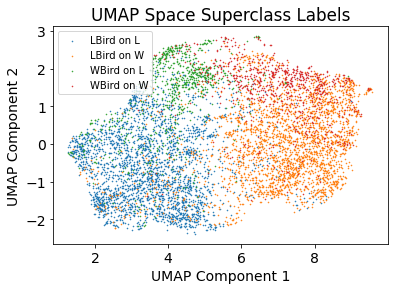

In [53]:
fig, ax = plt.subplots()
component_0 = embeds[:,0]
component_1 = embeds[:,1]
group = df_features['label'].values
size = 0.3
title = 'UMAP Space Superclass Labels'
labels = ['LBird on L', 'LBird on W', 'WBird on L', 'WBird on W']
# legend = {0:'C0', 1:'C1'}

for g in np.unique(group):

  idx = np.where(group == g)
  ax.scatter(component_0[idx], component_1[idx], label=labels[g], s=size,)  # c = legend[g],

plt.rc('font', size=14) 
ax.legend(fontsize=10)

plt.title(title)


plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
fig = plt.gcf()
plt.show()

In [54]:
df_features = pd.read_csv('./features_sub.csv', index_col=0)
features = df_features.drop(['label'], axis=1).values
reducer = UMAP(random_state=8, n_components=2)
embeds = reducer.fit_transform(features)

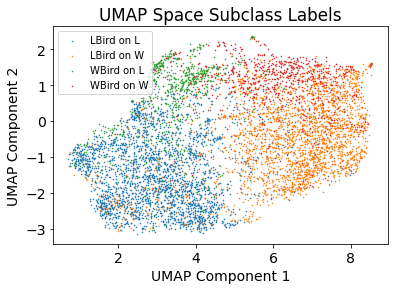

In [55]:
fig, ax = plt.subplots()
component_0 = embeds[:,0]
component_1 = embeds[:,1]
group = df_features['label'].values
size = 0.3
title = 'UMAP Space Subclass Labels'
labels = ['LBird on L', 'LBird on W', 'WBird on L', 'WBird on W']
# legend = {0:'C0', 1:'C1'}

for g in np.unique(group):

  idx = np.where(group == g)
  ax.scatter(component_0[idx], component_1[idx], label=labels[g], s=size,)  # c = legend[g],

plt.rc('font', size=14) 
ax.legend(fontsize=10)

plt.title(title)


plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
fig = plt.gcf()
plt.show()

In [56]:
silhouette_avg = silhouette_score(embeds, df_features['label'].values)

In [57]:
silhouette_avg

0.14383115